<a href="https://colab.research.google.com/github/rzunick/MNA-Navegacion-Autonoma-Equipo-14/blob/main/2_1_Detecci%C3%B3n_de_Carriles_Equipo14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

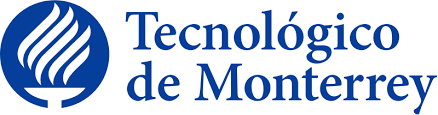

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Navegación autónoma**
## Profesor: David Antonio Torres
## Actividad 2.1 - Detección de carriles en video usando transformada de Hough
## **Equipo 14**: 
### - *Alejandro Juárez Corona-A01168444*
### - *Juan Carlos Lopez Cruz- A01793052*
### - *Ronald David Zúniga Sánchez-A01686240*
### - *Rodrigo López Aguilera-A01793071*

# Instrucciones:
* Genera un video en formato mp4, en el cual se puedan apreciar las líneas de los carriles en una carretera o camino. Puedes buscar el video en alguna página de Internet o generarlo capturando la pantalla y usando alguno de los simuladores de vehículos autónomos que se discuten en el módulo 5. Asegúrate de que el recorrido del auto sea aproximadamente en línea recta y que el video no tenga una duración superior a un minuto.
* Crea un script de Python en donde se codifiquen todos los pasos necesarios para la detección de carriles, siguiendo la secuencia presentada en los materiales de aprendizaje de este módulo. En caso de que desees desarrollar tu script de Python como Jupyter Notebook, es importante que te asegures que la ejecución del video se presente en una ventana independiente.
* Agrega los comentarios necesarios a tu script de Python para explicar cada uno de los pasos, entre ellos, la definición de la Región de Interés y el número de líneas generadas por la Transformada de Hough.
* Verifica que tu script funciona correctamente en el video de prueba y que la detección de carriles sucede en cada uno de los frames.
* Captura tu pantalla mientras se ejecuta tu script en el video de prueba. Sube tu video a tu canal de YouTube y guarda el enlace.
* A manera de reporte, crea un documento que incluya tu script con los comentarios y el enlace de tu video en YouTube. Tanto el código como los comentarios son importantes para el documento.

# Introducción:
Los detectores tradicionales generalmente resuelven el problema de detección de carril basándose totalmente en datos visibles. El concepto principal de estas técnicas es aprovechar las pistas visibles a través del procesamiento de imágenes utilizando operaciones ajustadas manualmente.

**Transformada de Hough:** 
El propósito de la Transformada de Hough es identificar líneas rectas en una imagen. Una línea recta puede ser representada por los parámetros (a,b) que representan la pendiente y el intercepto. La línea en coordenadas cartesianas (x,y) se describe con la siguiente ecuación.
$$y = a ∗ x + b$$

![image.png](attachment:image.png)
<center> Figura 1. Línea recta en espacio cartesiano a espacio de Hough.

La línea también puede ser representada en coordenadas polares con los parámetros (ρ, Θ). El primer parámetro, ρ, es la distancia más corta desde el origen hasta la línea (acercándose a la línea perpendicularmente). El segundo, Θ, es el ángulo entre el eje x y la línea de distancia. La línea se describe con la siguiente ecuación.
$$ρ = x ∗ cos(Θ) + y ∗ sin(Θ)$$

Estos parámetros pueden ser representados en otro plano de transformación como se ve en la figura 1. Este nuevo plano que contiene los parámetros (ρ, Θ), sera llamado espacio de Hough

Un punto en el plano cartesiano se representa como una sinusoidal en el plano de Hough como se ven la figura 1. Esto se demuestra al reemplazar (x,y) por valores constantes en la ecuacion 2.2. Múltiples puntos que forman parte de una misma recta en el espacio cartesiano, forman múltiples sinusoidales en el espacio de Hough, las cuales se intersectan en un punto que corresponde a los valores de (ρ, Θ) que forman la recta a la cual pertenecen los puntos en el plano cartesiano, como se puede ver en la figura 2.

![image-2.png](attachment:image-2.png)
<center>Figura 2. Puntos en espacio cartesiano a espacio de Hough.


Esto permite encontrar múltiples puntos que forman una recta en una imagen binaria al encontrar las intersecciones de sus sinusoidales en el plano de Hough. Para aplicaciones reales, el espacio de Hough se divide en cuadriculas con sus respectivos valores de (ρ, Θ) y se implementa un sistema de votos con valores limites, es decir si una sinusoidal pasa por una cuadricula, esta cuadricula obtiene un voto y si una cuadricula obtiene más votos que el valor limite asignado, se considera como una recta presente en la imagencon los valores (ρ, Θ) de tal cuadricula. Una práctica común es utilizar detectores de bordes como Canny o filtros usando HSV/HSL para generar una máscara binaria y luego utilizar la transformada de Hough para detectar líneas rectas dentro de la imagen.

# Funcionamiento del programa:

El siguiente programa se basa en las siguientes 4 celdas:

1-Librerias necesarias: numpy y Open Cv.

2- Variables de entrada: Tamaño del frame y nombre del archivo. 

3- Definición de los limites región de interés (REGION OF INTEREST, ROI): Se deben seleccionar 4 puntos cada uno con **doble click izquierdo** se observarán en <font color='blue'> **azul** </font> para formar un trapecio y obtener la región de interés  de un frame del video solicidado.

**Ejemplo:**
![image.png](attachment:image.png)

**Nota: Para terminar el programa se debe presionar la tecla ESC**

4- Detección de carriles en video:
* a) Carga de video.
  * Cada paso se debe aplicar a cada frame del video.
  * Redimensionamiento de cada frame.
  * Conversión de cada frame de BRG a RGB
  * Conversión de cada frame a escala de grises.
* b) Aplicación de un filtro Gaussiano para suavizar la imagen.
* c) Extracción de bordes con Canny
* d) Recorte de área de interés (ROI)
  * Se crea una imagen que contenga polígono con la ROI seleccionada en la celda 2 y  se pinta de blanco la ROI dejando el resto de la imagen en negro.
  * El polígono obtenido con la ROI se le aplicara una operación AND entre la imagen con la ROI y el resultado de Canny.
* e) Aplicación de transformada de Hough para detectar líneas al área de interés (ROI).
  * Al resultado mostrado de la operación AND entre la imagen con la ROI y el resultado de Canny se le aplica la transformada de Hough en la cual se tiene que pintar el resultado en  lineas de color <font color='red'> **rojo** </font> todo aquello que detecte como líneas dentro de la región de interés  (ROI).
  
**Nota: Para terminar el programa antes de que termine el video se debe presionar la tecla ENTER**

## Librerias necesarias

In [ ]:
import numpy as np
import cv2

## Variables de entrada.

In [ ]:
size=(1000,500) # Tamaño de los frames
file="test5.mp4" # Nombre del video a ejecutar

## Definición de los limites región de interés (REGION OF INTEREST, ROI)

In [ ]:
cap = cv2.VideoCapture(file) #Captura de video.
ret, frame = cap.read() 
img=cv2.resize(frame,(size), interpolation = cv2.INTER_AREA)

xx=[] # Lista para guardar las coordenadas en x
yy=[] # Lista para guardar las coordienadas en y

# Funcion para dibujar circulos de radio 10 en la imagen para indicar los limites.
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),10,(255,0,0),-1)
        xx.append(x)
        yy.append(y)

cv2.namedWindow('Selecciona los 4 puntos de la ROI con doble click y después presiona la tecla ESC.')
cv2.setMouseCallback('Selecciona los 4 puntos de la ROI con doble click y después presiona la tecla ESC.',draw_circle)
while(1):
    cv2.imshow('Selecciona los 4 puntos de la ROI con doble click y después presiona la tecla ESC.',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

## Detección de carriles en video:

In [ ]:
cap = cv2.VideoCapture(file)
while (cap.isOpened()):
    #ret es un valor Booleano que indica si el frame se leyó correctamente
    #frame es el frame actual del archivo
    ret, frame = cap.read()    
    if ret==True:
        img_bgr=cv2.resize(frame,(size), interpolation = cv2.INTER_AREA)
        #se aplica blurring y se obtienen los bordes con Canny
        img_grey = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        img_blur = cv2.GaussianBlur(img_grey,(3,3), 0, 0)
        img_canny = cv2.Canny(img_blur, 40, 120) 

        #Se crea la ROI con los vertices seleccionados anteriormente y se aplica a la imagen en escala de grises que resulta de aplicar Canny

        vertices = np.array([[(xx[0],yy[0]),(xx[1],yy[1]), (xx[2], yy[2]), (xx[3],yy[3])]], dtype=np.int32)
        img_roi = np.zeros_like(img_grey)
        cv2.fillPoly(img_roi, vertices, 255)
        img_mask = cv2.bitwise_and(img_canny, img_roi)
        # Se aplica la Transformada de Hough
        rho = 1            # resolución de rho en pixeles
        theta = np.pi/180  # resolución de theta en radianes 
        threshold = 10     # mínimo número de votos para ser considerado una línea 
        min_line_len = 10  # mínimo número de pixeles para que se forme una línea
        max_line_gap = 100 # máximo espacio en pixeles entre segmentos de línea    
        lines = cv2.HoughLinesP(img_mask, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
        # se crea un fondo negro del tamaño de la imagen con bordes
        img_lines = np.zeros((img_mask.shape[0], img_mask.shape[1], 3), dtype=np.uint8)
        # se dibujan cada una de las líneas sobre la imagen con fondo negro    
        for line in lines:
            for x1,y1,x2,y2 in line:      
                cv2.line(img_lines, (x1, y1), (x2, y2), [255, 0, 0], 30)

        alpha = 1
        beta = 1
        gamma = 1
        img_lane_lines = cv2.addWeighted(img_rgb, alpha, img_lines, beta, gamma)
        img_rgb_lane = cv2.cvtColor(img_lane_lines, cv2.COLOR_BGR2RGB)   # Se convierte la imagen con lineas en rgb.
        cv2.imshow( file+'_Presiona la tecla ENTER para salir', img_rgb_lane)
        #se cierra la ventanapresionando la tecla de ENTER
        if cv2.waitKey(5) & 0xFF == 13: 
            break
    else: break
    

#se libera lel archivo y se cierra la ventana
cap.release() 
cv2.destroyAllWindows()   

# Conclusiones:

Este programa muestra una forma de como detectar carriles en un video a través de una serie de pasos donde el más crítico es la definición de la región de interés  (ROI) si bien los parámetros de la transformada de hough debieron ser modificados también ya que deben de ser más abiertos en el threshold (Disminuir el número de votos para considerar una linea), minLineLenght (se redujo a 10 pixeles para que siguiera encontrando lineas) y maxLineGap(se aumentó a 50).

Estas modificaciones en la función de open CV de Hough fueran necesarias para que siguiera detectando líneas ya que si no el programa colapsaba y también como fueron usados videos grabados desde un carro la resolución y la condición de la carretera afecta en el resultado.

Se probo el programa con 5 videos, donde 3 de ellos fueron grabados con poca luz o con el atardecer (videos test2, test3 y test5) se observó buen comportamiento en la detección de carriles.

Test 2:
![image-5.png](attachment:image-5.png)

Test 3:
![image-6.png](attachment:image-6.png)

Test 5:
![image-7.png](attachment:image-7.png)

El programa se desarrollo con el video de ejemplo del profesor test1 y se probo con un video test4 con similares condiciones de luz para ver los resultados y estos fueron buenos.

Test 1: 
![image-3.png](attachment:image-3.png)

Test 4:
![image-4.png](attachment:image-4.png)

## Enlace de la demostración del script en YouTube (usar resolución en 1080):
https://www.youtube.com/watch?v=gVvt5xppX7M

# Referencias:
* Espejo Miranda, Ignacio. (2023). IMPLEMENTACIÓN Y EVALUACIÓN DE ALGORITMOS DE DETECCIÓN DE CARRIL ORIENTADOS A ENTORNOS DE CONDUCCIÓN ASISTIDA DE VEHÍCULOS.[Tesis de pregrado,UNIVERSIDAD TÉCNICA FEDERICO SANTA MARIA]. Repositorio Digital  https://hdl.handle.net/11673/55566
* OPENCV.(s.f.). Arithmetic Operations on Images.https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html
* OPENCV.(s.f.). Mouse as a Paint-Brush.https://docs.opencv.org/4.x/db/d5b/tutorial_py_mouse_handling.html
* OPENCV.(s.f.). Hough Line Transform.https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html